# Multivariable calculus

Notes from [brilliant.org's course](https://brilliant.org/courses/multivariable-calculus/) on Multivariable Calculus.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Define-functions" data-toc-modified-id="Define-functions-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Define functions</a></span></li></ul></li><li><span><a href="#Vectors" data-toc-modified-id="Vectors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vectors</a></span></li><li><span><a href="#Limits" data-toc-modified-id="Limits-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Limits</a></span></li><li><span><a href="#Volume-of-sphere-in-$n$-dimensions" data-toc-modified-id="Volume-of-sphere-in-$n$-dimensions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Volume of sphere in $n$ dimensions</a></span></li><li><span><a href="#Integrals-and-volumes-in-higher-dimensions" data-toc-modified-id="Integrals-and-volumes-in-higher-dimensions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Integrals and volumes in higher dimensions</a></span></li><li><span><a href="#Finding-extrema" data-toc-modified-id="Finding-extrema-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finding extrema</a></span><ul class="toc-item"><li><span><a href="#Cost-of-producing-a-box" data-toc-modified-id="Cost-of-producing-a-box-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Cost of producing a box</a></span></li><li><span><a href="#Minimizing-cost-of-producing-a-box" data-toc-modified-id="Minimizing-cost-of-producing-a-box-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Minimizing cost of producing a box</a></span></li></ul></li></ul></div>

In a nutshell, **multivariable calculus extends** the familiar **concepts of limits, derivatives, and integrals to functions with more than one independent variable**.

Multivariable calculus is much more than just a repeat of single-variable calculus, however. It's a rich subject with its own unique puzzles and surprises. It introduces new tools that solve important problems in machine learning, neural networks, engineering, quantum computing, and astrophysics, to name just a few.

### Define functions

In [4]:
def dx(x, delta=0.001):
    """ find derivative of a function derivative """
    return (func(x + delta) - func(x)) / delta

def solve(func, value, x=0.5, max_tries=1000, max_err=0.1, 
          print_all=False, x_round=5):
    """ 
    equation solver
    find 'x' that maps through 'func' to 'value'
    
    moves 'x' by 'err' divided by 'slope'
    in the direction opposite to 'slope'
    until 'func(x)' - 'value' < 'max_err' 
    """
    for tries in range(max_tries):
        err = func(x) - value
        if abs(err) < max_err:
            return x
        slope = dx(x)
        x = x - err / slope
        if print_all:
            print(x)
    print("After {0:,} iterations, no solutions found within:\nerr = {1}"
          .format(max_tries, err))
    print("Last value of x = {0:.{1}f}".format(x, x_round))
    return

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

def plot_xy(x=None, y=None, line_color='blue', 
            line_label="", line_label_size=16,
            line_label_xlift=1, line_label_ylift=1.05,
            points_x = None, points_y = None, 
            points_color='red', points_size=3,
            plot_title = "",
            v_line = None, h_line = None,
            sup_line_style = '--', sup_line_width = 0.5, sup_line_color = 'gray',
            x_lim = None, y_lim = None,
            create = True, show = True, ax = None,
            ):
    """
    plot funcs
    """

    def plot_lines(type, line):
        """
        plots and annotates horizontal and vertical lines
        """
        if type == 'h':
            ax.axhline(line, color=sup_line_color,
                       linestyle=sup_line_style, linewidth=sup_line_width)
            ax.text(0, line, line)
        elif type == 'v':
            ax.axvline(line, color=sup_line_color,
                       linestyle=sup_line_style, linewidth=sup_line_width)
            ax.text(line, 0, line)
        else:
            print("func 'plot_lines': Input parameter 'type' must be either 'h' or 'v'.")

    line_text_style = dict(horizontalalignment='right', 
                           verticalalignment='center',
                           fontsize=line_label_size, 
                           fontdict={'family': 'monospace'})
            
    if create == True:
        f, ax = plt.subplots(1, figsize=(6, 6))
        f.suptitle(plot_title)
        # plot axes
        ax.axvline(0, color='black', linestyle='-', linewidth=2)
        ax.set_ylabel('y', rotation=0)
        ax.axhline(0, color='black', linestyle='-', linewidth=2)
        ax.set_xlabel('x')
        ax.grid(False)

    # plot the function (if supplied in arguments)
    if x is not None and y is not None:
        ax.plot(x, y, color=line_color)
        
        ax.text(x[int(len(x) / 2)] * line_label_xlift, 
                y[int(len(y) / 2)] * line_label_ylift, 
                line_label, color=line_color, **line_text_style)
        
    # plot the points (if supplied in arguments)
    if points_x is not None and points_y is not None:
        ax.scatter(points_x, points_y, s=points_size, color=points_color)

    # plot vertical lines (if supplied)
    if isinstance(v_line, Iterable):
        for line in v_line:
            plot_lines('v', line)
    elif type(v_line) is float or type(v_line) is int:
        plot_lines('v', v_line)

    # plot horizontal lines
    if isinstance(h_line, Iterable):
        for line in h_line:
            plot_lines('h', line)
    elif type(h_line) is float or type(h_line) is int:
        plot_lines('h', h_line)

    # zoom axes
    if x_lim:
        ax.set_xlim(x_lim[0], x_lim[1])
    if y_lim:
        ax.set_ylim(y_lim[0], y_lim[1])


    if show == True:
        plt.show()


## Vectors

**Vectors play an essential role** in multivariable calculus. For now, we can think of vectors as arrows in space. A vector is **defined by its direction and its length (or magnitude)**.

Vectors **can also be thought of as collections of numbers**, making them ideal building blocks for multivariable functions.  Locating a point that sits in a 3-D space requires three numbers called **coordinates**. The vector whose tip sits at the point can also be described with these same three numbers.

<img src='img/mc_pic1.png' width='300'>

Looking at the last problem from a different perspective, we can use the two angles specifying the direction of the vector and its length to locate a point in space. This is the essential idea behind **spherical coordinates**, a topic covered in detail in [Coordinates in 3D](https://brilliant.org/practice/3d-coordinate-systems/?p=1).

## Limits

Calculus truly is the mathematics of **limits**. Without limits, we couldn't define derivatives or integrals, the two pillars of our subject. This is true no matter how many independent variables we have.

A single-variable limit can often be done with the help of continuity. Mathematically, continuity at a point $a$ means

$$ \lim \limits_{x \to a} f(x) = f(a) $$

Intuitively, it means that the graph of the function has no holes or jumps or breaks.

## Volume of sphere in $n$ dimensions

The integral was originally designed to solve planar area problems. Similarly, **multiple integrals** are very useful in solving volume problems in higher dimensions.

We can start thinking about volumes of simple objects in higher dimensions even though we don't know how to integrate in higher dimensions yet or even how to properly visualize them with our 3D minds. We can do this by analogy.

**Spheres** in $n$ dimensions are characterized by a radius. A sphere consists of all points at a fixed distance from a given center. The circle is the lowest dimensional sphere familiar to you. If it has radius $r$, its area is $\pi r^2$ Also, the sphere in 3D has volume $\frac{4} {3} \pi r^3$ if it has radius $r$.

Arguing by analogy, the pattern set by the circle and the 3D sphere seems to indicate that the **volume is proportional to $r^n$**.

To prove this requires use of **multiple integrals**, a tool we haven't yet added to our toolbox. We can, however, argue roughly this way: the radius has units of length. It is in fact the only characteristic about a sphere that has such units. Volume in $n$ dimensions, on the other hand, has units $(\text{length})^n$ (Think about square meter as a unit of area and cubic meter as a unit of volume, for example.) Since the radius is the only quantity carrying the unit of length, it stands to reason just based on unit analysis that

$$ V \propto r^n $$

(Here and throughout, $\propto$ is short for “proportional to.”)

## Integrals and volumes in higher dimensions

It may seem silly to consider volumes that are more than three-dimensional, but they play important roles in probability and physics where there could be thousands, millions, or even billions of variables.

Mathematically, if $f(x) > 0$ on $[a, b]$, then the area between the graph and the lines $y = 0$, $x = a$, $x = b$ is

$$ \int \limits_{x=a}^{x=b}f(x)dx $$

When we generalize to multiple variables, we'll have an integral sign for each new variable, or dimension. For example, the $n$-dimensional sphere
has volume

$$ x_1^2 + x_2^2 + \dots + x_n^2 = r^2 $$

has volume 

$$ \int \dots \int_{x_1^2 + x_2^2 + \dots + x_n^2 \leq r}1 dx_1 \dots dx_n \propto r^n $$

To better explain this expression, the upcoming 3D volumes unit will introduce two-variable integrals through the Riemann sum.

## Finding extrema

Finding the largest and smallest possible values of a function, or [extremizing](https://brilliant.org/wiki/optimization-problems/), is one of the most important practical applications of calculus.

Finding the optimal values of a function of several variables is even more useful since many successful real-life models depend on two or more inputs.


### Cost of producing a box

Let's start with a classic two-variable problem. Imagine a box with base length $x$ and height $y$. The box doesn't have a lid. The cost of manufacturing is directly proportional to the amount of material (or surface area) of the box.

<img src='img/mc_pic2.png' width='150'>

The surface area of the box $A$ is dependent on the base width $x$ and the height $y$.

We express this relationship explicitly as

$ A(x,y) = x^2 + 4xy $

Writing the surface area as $A(x,y)$ tells us that it is a function of both base width and height.

A company wants to produce such a box with base width at least 4 units and a height of at least 1 unit. If box material is 4 dollars per unit area, what's the cost of the cheapest box that can be produced?

**Answer**

The cost of this box would be $C(A) = 4A(4, 1) = 4(4^2 + 4\cdot 4 \cdot 1) = 128$

### Minimizing cost of producing a box

Now suppose the company wants to produce the cheapest possible box with a fixed volume of $x^2y = 4$ cubic units.

Besides being positive, there's no restriction on the base width $x$ or the height $y$ this time.

If the cost is $C(x,y) = 4x^2 + 16xy$, what is the minimum in this case?

**Answer**

Since there is an additional constraint $x^2y = 4$, $x$ and $y$ are no longer independent, and we can express $y$ through $x$ as follows:

$ x^2y = 4 \implies y = \frac{4} {x^2} $

Now, we can write cost of producing a box as a function of one variable:

$ C(x) = 4x^2 + 16x \left( \frac{4} {x^2} \right) = 4x^2 + \frac{64} {x} $

In [48]:
def cost_x(x):
    """ cost function """
    return 4 * x ** 2 + 64 / x

To find its minimum, we first find its derivative $C'(x)$ and then solve the condition of minimum $C'(x) = 0$:

$ C'(x) = 8x - \frac{64} {x^2} = 0 \implies x^3 = 8 \implies x = 2 $

This is the only critical point for $C(x)$. By taking the second derivative $C''(x)$, we can verify that it is indeed a local minimum:

$ C''(x) = 8 + \frac{128} {x^3} \implies C''(2) = 8 + \frac{128} {8} > 0 $

In [50]:
def der_cost(x):
    """ derivative of the cost function """
    return 8 * x - 64 / x ** 2

Find $x$ that satisfies the condition of minimum $C'(x) = 0$: 

x =  2.0
Minimum function value:  48.0


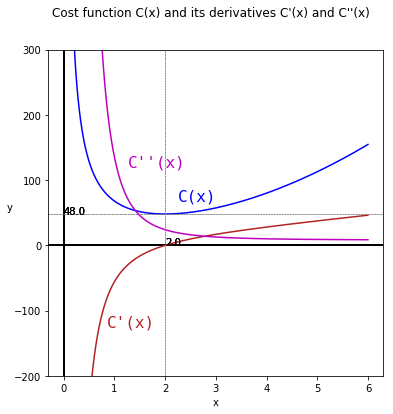

Wall time: 374 ms


In [134]:
%%time
min_x = solve(der_cost, 0, x=1, 
              max_tries=1000000, max_err=0.00000000000001, 
              x_round=7)
print("x = ", min_x)
print("Minimum function value: ", cost_x(min_x))

x = np.linspace(0.0000001, 6, 1000)
y = 4 * x ** 2 + 64 / x
plot_xy(x, y, line_label='C(x)', line_label_ylift=1.3,
        plot_title="Cost function C(x) and its derivatives C'(x) and C''(x)", 
        y_lim=[-200, 300],
        v_line=min_x, h_line=cost_x(min_x), 
        show=False)

ax = plt.gca()

y = 8 * x - 64 / x ** 2
plot_xy(x, y, line_color='firebrick', 
        line_label="C'(x)", line_label_xlift=0.6, line_label_ylift=-7,
        v_line=min_x, h_line=cost_x(min_x), create=False, ax=ax, show=False)

y = 8 + 128 / x ** 3
plot_xy(x, y, line_color='m', 
        line_label="C''(x)", line_label_xlift=0.8, line_label_ylift=10,
        v_line=min_x, h_line=cost_x(min_x), create=False, ax=ax)

$ C(x) =  4x^2 + \frac{64} {x}, 
\quad  C'(x) = 8x - \frac{64} {x^2}, \quad C''(x) = 8 + \frac{128} {x^3} $

It in fact has to be the global minimum since

$ \lim \limits_{x \to 0^+} C(x) = \infty, \quad \lim \limits_{x \to \infty} C(x) = \infty $

Plugging $ x = 2 $ into the formula for the cost function gives us

$ C(2) = 4(2)^2 + \frac{64} {2} = 16 + 32 = 48 $